<a href="https://colab.research.google.com/github/Lfahima/datasci_6_regression/blob/main/HHA507_Assignment_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Packages**

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor




## **Dataset**

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## **Variables**
### Independent Variable: age
### Dependent Variable: thalach

## **Simple linear regression model**

In [ ]:
# Fit the regression model
X = sm.add_constant(df['age'])  # Adds a constant term to the predictor
model = sm.OLS(df['thalach'], X)

results = model.fit()

# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.27e-38
Time:                        19:45:09   Log-Likelihood:                -4583.4
No. Observations:                1025   AIC:                             9171.
Df Residuals:                    1023   BIC:                             9181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.9793      4.028     50.388      0.0

In [ ]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0390811261181612, p-value=0.33243550612402967


In [ ]:
residuals = results.resid
fitted = results.fittedvalues

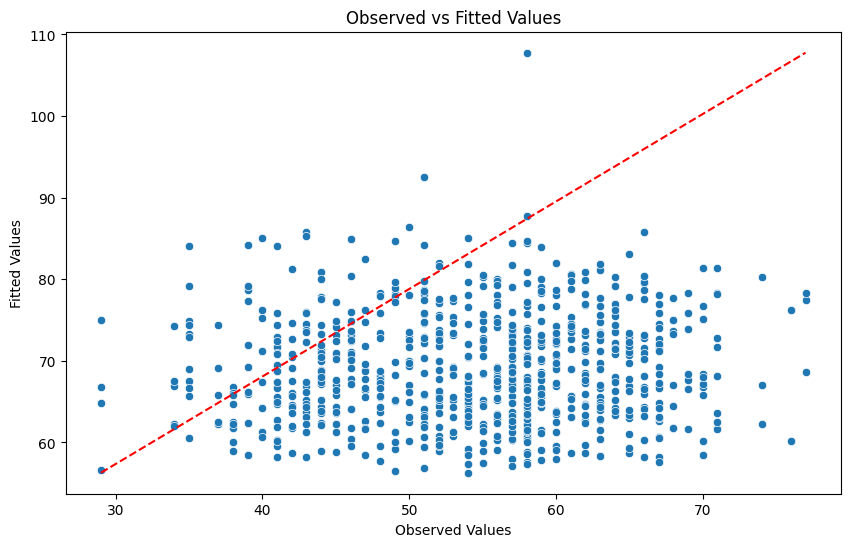

In [16]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['age']), max(df['age'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Shapiro-Wilk Test: W=0.961816668510437, p-value=9.922788747967972e-16


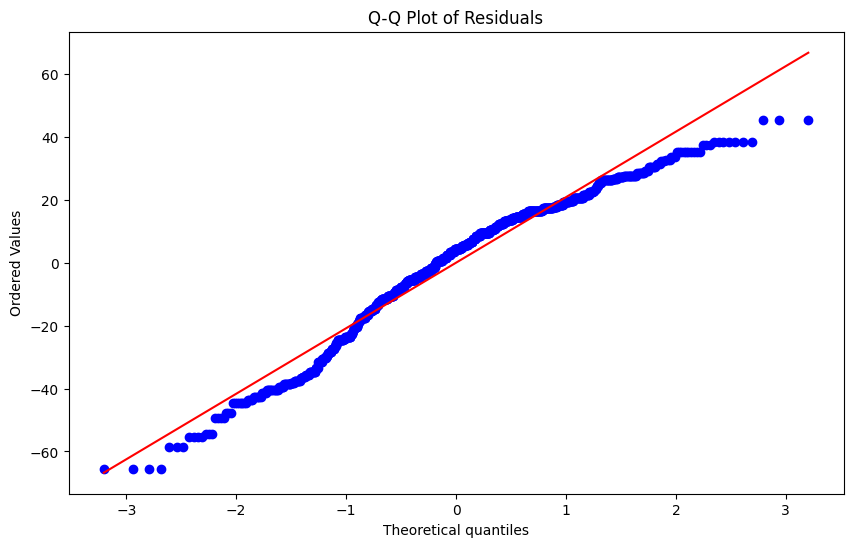

In [ ]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.9972307558965658, p-value=0.5124783194112276


## Checking the assumptions for the linear regression model
- Since the p-value for the Rainbow test is 0.611694 (which is greater than a p-value of 0.05), a linear relationships exist between the independent variable and dependent variable.
- Since the p-value for the Shapiro-Wilk Test is
 9.922788747967972e-16 (which is less than a p-value of 0.05), it shows that the residuals are not normal distributed.
- Since the Goldfeld-Quandt Test has a p-value of 0.51247 (which is greater than a p-value of 0.05), hence the residuals are homoskedastic.

## Model evaluation
The R-squared value for the simple linear regression model is  
0.152, which means that the independent varible is not a good predictor of the dependent variable.

## The reasoning behind my dataset and variable choices
I chose this data set titled Heart Disease Dataset because it was interesting to see the various health attributes that are linked to heart disease and if they have any correlation.
I also chose this data set because it included mul;tiple numerical variables I could work with.
I chose age as the independent variable and thalach as the dependent variable. I did not choose it for a oparticular reason, but I did want to see if there was a relationship between the two.


## **Multiple linear Regressions**

## Dataset

In [ ]:
HCD_df = pd.read_csv('health care diabetes.csv')
HCD_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Variables
### Independent Variables: Pregnancies, Age, Insulin, SkinThickness, Glucose
### Dependent Variables: BloodPressure

In [ ]:
# Fit the regression model
X = HCD_df[['Pregnancies', 'Age', 'SkinThickness', 'Glucose', 'Insulin']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(HCD_df['BloodPressure'], X)

results = model.fit()

# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     20.70
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.02e-19
Time:                        19:47:40   Log-Likelihood:                -3315.9
No. Observations:                 768   AIC:                             6644.
Df Residuals:                     762   BIC:                             6672.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.9702      3.079     14.282

In [ ]:
residuals = results.resid
fitted = results.fittedvalues

In [ ]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
        Variable        VIF
0          const  21.925761
1    Pregnancies   1.426315
2            Age   1.521776
3  SkinThickness   1.257051
4        Glucose   1.236977
5        Insulin   1.414796


In [ ]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9713537666175356, p-value=0.611694664008815


Shapiro-Wilk Test: W=0.8461138606071472, p-value=1.2244406229488998e-26


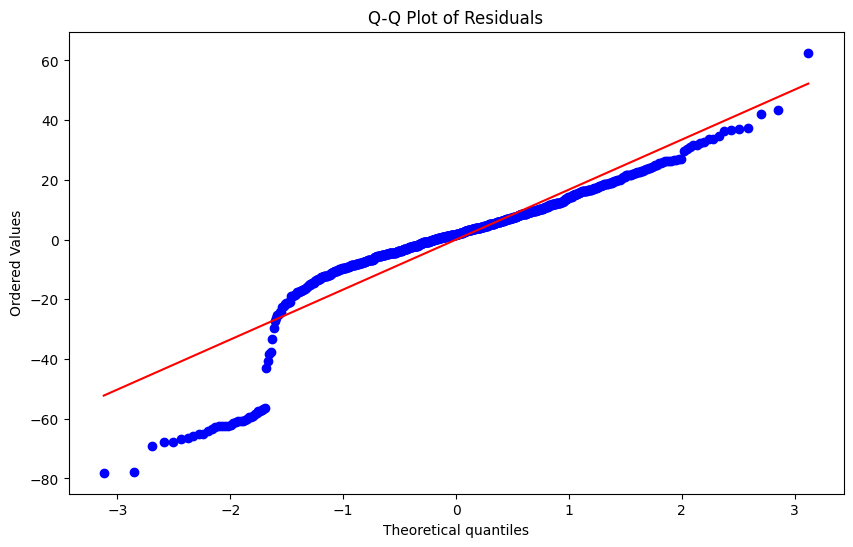

In [ ]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")


Goldfeld-Quandt Test: F-statistic=0.9413666853284985, p-value=0.7213784205973961


## Checking the assumptions for the multiple regression model
- Since the VIF value of each independent variable I have chosen is less than 10, there is no multicollineraity in the multiple regression model.  
- Since the p-value for the Rainbow test is 0.611694 (which is greater than a p-value of 0.05), a linear relationships exist between the independent variables and dependent variable.
- Since the p-value for the Shapiro-Wilk Test is p-value= 1.2244406229488998e-26 (which is less than a p-value of 0.05), it shows that the residuals are not normal distributed.
- Since the Goldfeld-Quandt Test has a p-value of 0.7213784205973961 (which is greater than a p-value of 0.05), hence the residuals are homoskedastic.

## Model evaluation
The R-squared value for the multiple regression model is 0.120, which means that the independent varibles are not good predictor of the dependent variable.


## The reasoning behind my dataset and variable choices
I chose this data set titled Diabetes Healthcare: Comprehensive Dataset-AI, because it was interesting to see the amount of pregnancies, if any, of the individuals included in the data report and different health attributes that can determine diabetes status and how their BMI or cholesterol, etc.. impact diabetes status. I also chose this dataset because it included multiple continues variables and I knew I had multiple independent varibales to work with.
I chose blood pressure as the dependent varibale and Pregnancies, Age, Insulin, SkinThickness, Glucose as the independent variables for no specific reason, I knew they would work and it was interesting to see the relationships between the independent variables and dependent variable.